In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Model- Description

1. Use VGG-16 pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add 2 FC layers and a output layer to classify 2 classes. 
3. Final architecture will be INPUT --> VGG-16 without Top layers(FC) ---> 2 FC layers --> Output Layer
4. Train only FC layers, output layer. Don't train the VGG-16 network. 


In [5]:
#import tensorflow
import tensorflow as tf 

#code to check whether gpu is thier or not
if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
import os
import numpy as np
import pandas as pd
import cv2

In [7]:
# import the libraries as shown below
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
dir_path ="/content/drive/My Drive/cat/cat_images"

In [12]:
len(os.listdir(dir_path))

8

In [13]:
!pip install split-folders
import splitfolders 
input_folder = "/content/drive/MyDrive/cat/cat_images"
output = "/content/drive/MyDrive/output_cats" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) 


Copying files: 414 files [01:45,  3.91 files/s]


In [14]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  Bombay_cat_images  category is  86
No of Images in  American_Shorthair_Cat_images  category is  48
No of Images in  Kinkalow_cat_images  category is  48
No of Images in  Norwegian_Forest_cat_images  category is  48
No of Images in  Persian_cat_images  category is  50
No of Images in  Ragdoll_cat_images  category is  47
No of Images in  Simese_cat_images  category is  46
No of Images in  Turkish_Van_cat_images  category is  41


In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/output_cats/train'
valid_path = '/content/drive/MyDrive/output_cats/val'

In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


#[3] is for rgb scale image and [1] is for grayscale image

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
# don't train existing weights
#freezing the weights
for layer in vgg16.layers:
    layer.trainable = False

In [18]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/output_cats/train')

In [30]:
# our layers - you can add more if you want
Dense1 = Dense(500,name="Dense1",activation='relu')(vgg16.output)
Dense2 = Dense(500,name="Dense2",activation='relu')(Dense1)
x=Flatten()(Dense2)
prediction = Dense(8,name="Output", activation='softmax')(x)

In [31]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [32]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/output_cats/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 327 images belonging to 8 classes.


In [36]:
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/output_cats/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 37 images belonging to 8 classes.


In [37]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/15
 6/11 [===============>..............] - ETA: 4s - loss: 3.2870 - accuracy: 0.1317

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/11 [==============================] - 14s 1s/step - loss: 2.6705 - accuracy: 0.1590 - val_loss: 2.0034 - val_accuracy: 0.2703
Epoch 2/15
11/11 [==============================] - 10s 925ms/step - loss: 1.8357 - accuracy: 0.3517 - val_loss: 1.6307 - val_accuracy: 0.4865
Epoch 3/15
11/11 [==============================] - 10s 867ms/step - loss: 1.3846 - accuracy: 0.5321 - val_loss: 1.1967 - val_accuracy: 0.5405
Epoch 4/15
11/11 [==============================] - 10s 911ms/step - loss: 1.0649 - accuracy: 0.6055 - val_loss: 1.1517 - val_accuracy: 0.5946
Epoch 5/15
11/11 [==============================] - 10s 983ms/step - loss: 0.8610 - accuracy: 0.7003 - val_loss: 1.0852 - val_accuracy: 0.5946
Epoch 6/15
11/11 [==============================] - 10s 936ms/step - loss: 0.6005 - accuracy: 0.8135 - val_loss: 1.0957 - val_accuracy: 0.6486
Epoch 7/15
11/11 [==============================] - 10s 914ms/step - loss: 0.5087 - accuracy: 0.8135 - val_loss: 1.1440 - val_accuracy: 0.6486
Epoch 8/15
11

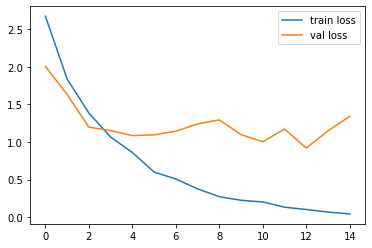

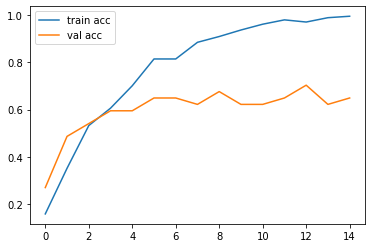

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Testing Pipeline

In [39]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/drive/MyDrive/output_cats/test/Ragdoll_cat_images/Ragdoll cat images_11.jpeg', target_size=(224, 224))

In [40]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [41]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [42]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [43]:
# predict the probability across all output classes
yhat = model.predict(image)

In [44]:
yhat

array([[1.2729423e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5422506e-30, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [45]:
result = np.where(yhat == np.amax(yhat))
r= result[1][0]
r

6

In [47]:
labels = sorted(os.listdir('/content/drive/MyDrive/output_cats/train'))


In [48]:
labels[r]

'Simese_cat_images'

In [49]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

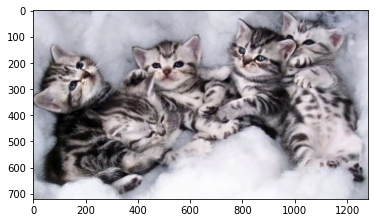

In [50]:
img = Image.open('/content/drive/MyDrive/output_cats/train/American_Shorthair_Cat_images/American Shorthair Cat images_10.jpeg')
np_img = np.array(img)
imgplot = plt.imshow(np_img)
plt.show() 

# Testing